<a href="https://colab.research.google.com/github/miranishilva/Covid-19-Analysis-Data-Visualization/blob/main/Covid-19_Analysis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Eksplorasi COVID19 di Indonesia**
Notebook ini merupakan eksplorasi pada data covid19 di Indonesia. Data diperoleh dari https://data.covid19.go.id/public/api/update.json dan di akses pada tanggal 2 Juli 2021, pukul 14.55. Eksplorasi hanya dilakukan dengan memvisualisasikan data. Notebook ini hanya eksplorasi pribadi, dimana saya juga sedang belajar menggunakan python untuk data analisis.

In [79]:
install.packages("httr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [80]:
library(httr)

mengakses API covid.go.id untuk mendapatkan dataset. Kode respon yang diperoleh adalah 200 yang berarti API berhasil diakses

In [81]:
resp <- GET ("https://data.covid19.go.id/public/api/update.json")
status_code(resp)

[1] 200

In [82]:
headers(resp)

$server
[1] "nginx"

$date
[1] "Fri, 02 Jul 2021 08:20:55 GMT"

$`content-type`
[1] "application/json"

$`transfer-encoding`
[1] "chunked"

$connection
[1] "keep-alive"

$vary
[1] "Accept-Encoding"

$`last-modified`
[1] "Fri, 02 Jul 2021 08:16:19 GMT"

$vary
[1] "Accept-Encoding"

$etag
[1] "W/\"60decb53-2de5c\""

$`x-content-type-options`
[1] "nosniff"

$`x-xss-protection`
[1] "1; mode=block"

$`strict-transport-security`
[1] "max-age=31536000; includeSubDomains; preload"

$`x-content-type-options`
[1] "nosniff"

$`x-xss-protection`
[1] "1; mode=block"

$`content-encoding`
[1] "gzip"

attr(,"class")
[1] "insensitive" "list"

Mengekstrak dataset yang kemudian menyimpannya kedalam variabel cov_id_raw

In [83]:
cov_id_raw <- content(resp, as="parsed", simplifyVector=TRUE )

Berdasarkan informasi dibawah ini dapat dilihat bahwa dataset yang diakses memiliki 2 kolom yaitu kolom data dan kolom update

In [84]:
length(cov_id_raw)
names(cov_id_raw)


[1] 2

[1] "data"   "update"

In [85]:
cov_id_update <- cov_id_raw$update
lapply(cov_id_update, names)

$penambahan
[1] "jumlah_positif"   "jumlah_meninggal" "jumlah_sembuh"    "jumlah_dirawat"  
[5] "tanggal"          "created"         

$harian
 [1] "key_as_string"        "key"                  "doc_count"           
 [4] "jumlah_meninggal"     "jumlah_sembuh"        "jumlah_positif"      
 [7] "jumlah_dirawat"       "jumlah_positif_kum"   "jumlah_sembuh_kum"   
[10] "jumlah_meninggal_kum" "jumlah_dirawat_kum"  

$total
[1] "jumlah_positif"   "jumlah_dirawat"   "jumlah_sembuh"    "jumlah_meninggal"

berdasarkan informasi dibawah dapat disimpulkan bahwa data tersebut terakhir diperbarui pada tanggal 1 Juli 2021 dengan total penambahan pasien sembuh 9874 pasien, penambahan pasien yang meninggal sebanyak 504 pasien. Sedangkan untuk total jumlah positif sebanyak 2.203.108 orang dan total pasien yang meninggal sebanyak 58.995 orang.

In [86]:
cov_id_update$penambahan$tanggal
cov_id_update$penambahan$jumlah_sembuh
cov_id_update$penambahan$jumlah_meninggal
cov_id_update$total$jumlah_positif
cov_id_update$total$jumlah_meninggal

[1] "2021-07-01"

[1] 9874

[1] 504

[1] 2203108

[1] 58995

# **Eksplorasi Covid-19 di Jawa Barat**
Data diperoleh dari "https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json" dan di akses pada tanggal 2 Juli 2021, pukul 14.55. Eksplorasi hanya dilakukan dengan memvisualisasikan data. 

Berdasrkan informasi berikut dapat disimpulkan bahwa total kasus Covid-19 di Jawa barat terdpat 350.719 kasus dengan tingkat kematian 1.34% dan tingkat pasien yang sembuh sebanyak 89.39%

In [87]:
resp_jabar <- GET("https://data.covid19.go.id/public/api/prov_detail_JAWA_BARAT.json")
cov_jabar_raw <- content(resp_jabar, as="parsed", simplifyVector=TRUE)
names(cov_jabar_raw)
cov_jabar_raw$kasus_total
cov_jabar_raw$meninggal_persen
cov_jabar_raw$sembuh_persen

[1] "last_date"            "provinsi"             "kasus_total"         
 [4] "kasus_tanpa_tgl"      "kasus_dengan_tgl"     "meninggal_persen"    
 [7] "meninggal_tanpa_tgl"  "meninggal_dengan_tgl" "sembuh_persen"       
[10] "sembuh_tanpa_tgl"     "sembuh_dengan_tgl"    "list_perkembangan"   
[13] "data"

[1] 350719

[1] 1.342385

[1] 89.39521

pada dataset tersebut terdapat 9 variabel

In [88]:
cov_jabar <- cov_jabar_raw$list_perkembangan
str(cov_jabar)
head(cov_jabar)

'data.frame':	478 obs. of  9 variables:
 $ tanggal                     : num  1.58e+12 1.58e+12 1.58e+12 1.58e+12 1.58e+12 ...
 $ KASUS                       : int  3 1 1 1 1 0 0 0 0 0 ...
 $ MENINGGAL                   : int  0 1 0 0 0 0 0 0 0 1 ...
 $ SEMBUH                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DIRAWAT_OR_ISOLASI          : int  3 0 1 1 1 0 0 0 0 -1 ...
 $ AKUMULASI_KASUS             : int  3 4 5 6 7 7 7 7 7 7 ...
 $ AKUMULASI_SEMBUH            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AKUMULASI_MENINGGAL         : int  0 1 1 1 1 1 1 1 1 2 ...
 $ AKUMULASI_DIRAWAT_OR_ISOLASI: int  3 3 4 5 6 6 6 6 6 5 ...


,tanggal,KASUS,MENINGGAL,SEMBUH,DIRAWAT_OR_ISOLASI,AKUMULASI_KASUS,AKUMULASI_SEMBUH,AKUMULASI_MENINGGAL,AKUMULASI_DIRAWAT_OR_ISOLASI
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1.583107e+12,3,0,0,3,3,0,0,3
2,1.583194e+12,1,1,0,0,4,0,1,3
3,1.583280e+12,1,0,0,1,5,0,1,4
4,1.583366e+12,1,0,0,1,6,0,1,5
5,1.583453e+12,1,0,0,1,7,0,1,6
6,1.583539e+12,0,0,0,0,7,0,1,6


In [89]:
devtools::install_github("tidyverse/tidyverse")

Skipping install of 'tidyverse' from a github remote, the SHA1 (195d8a45) has not changed since last install.
  Use `force = TRUE` to force installation



In [90]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



merubah format tanggal bulan-tahun untuk ditampilkan pada grafik

In [106]:
new_cov_jabar <- cov_jabar %>%
  select(-contains("DIRAWAT_OR_ISOLASI")) %>%
  select(-starts_with("AKUMULASI")) %>%
  rename(kasus_baru = KASUS,
         meninggal = MENINGGAL,
         sembuh = SEMBUH) %>%
  mutate(
     tanggal = as.POSIXct(tanggal/1000, origin = "1970-12-03"),
    tanggal = as.Date(tanggal)
  )
str(new_cov_jabar)
head(new_cov_jabar)

'data.frame':	478 obs. of  4 variables:
 $ tanggal   : Date, format: "2021-02-01" "2021-02-02" ...
 $ kasus_baru: int  3 1 1 1 1 0 0 0 0 0 ...
 $ meninggal : int  0 1 0 0 0 0 0 0 0 1 ...
 $ sembuh    : int  0 0 0 0 0 0 0 0 0 0 ...


,tanggal,kasus_baru,meninggal,sembuh
,<date>,<int>,<int>,<int>
1,2021-02-01,3,0,0
2,2021-02-02,1,1,0
3,2021-02-03,1,0,0
4,2021-02-04,1,0,0
5,2021-02-05,1,0,0
6,2021-02-06,0,0,0


In [92]:

install.packages("ggplot2", repos='http://cran.us.r-project.org')
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [93]:
devtools::install_github("tidyverse/tidyverse")

Skipping install of 'tidyverse' from a github remote, the SHA1 (195d8a45) has not changed since last install.
  Use `force = TRUE` to force installation



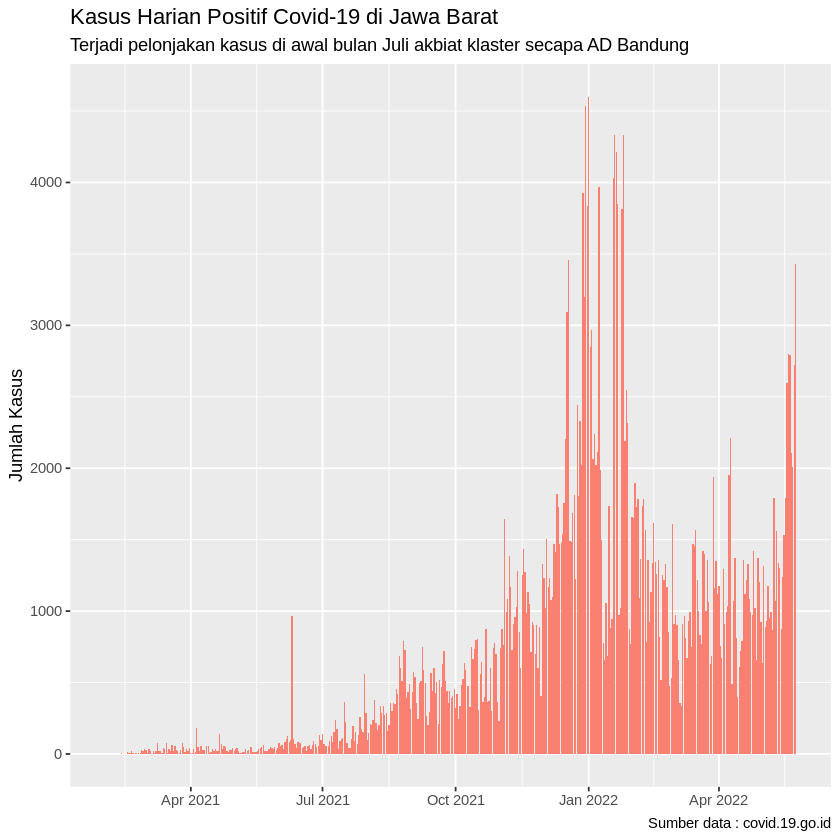

In [94]:
ggplot(data=new_cov_jabar, aes(tanggal,kasus_baru))+
geom_col(fill="salmon") +
  labs(
    x= NULL,
    y= "Jumlah Kasus",
    title = "Kasus Harian Positif Covid-19 di Jawa Barat",
    subtitle = "Terjadi pelonjakan kasus di awal bulan Juli akbiat klaster secapa AD Bandung",
    caption = "Sumber data : covid.19.go.id"
  )

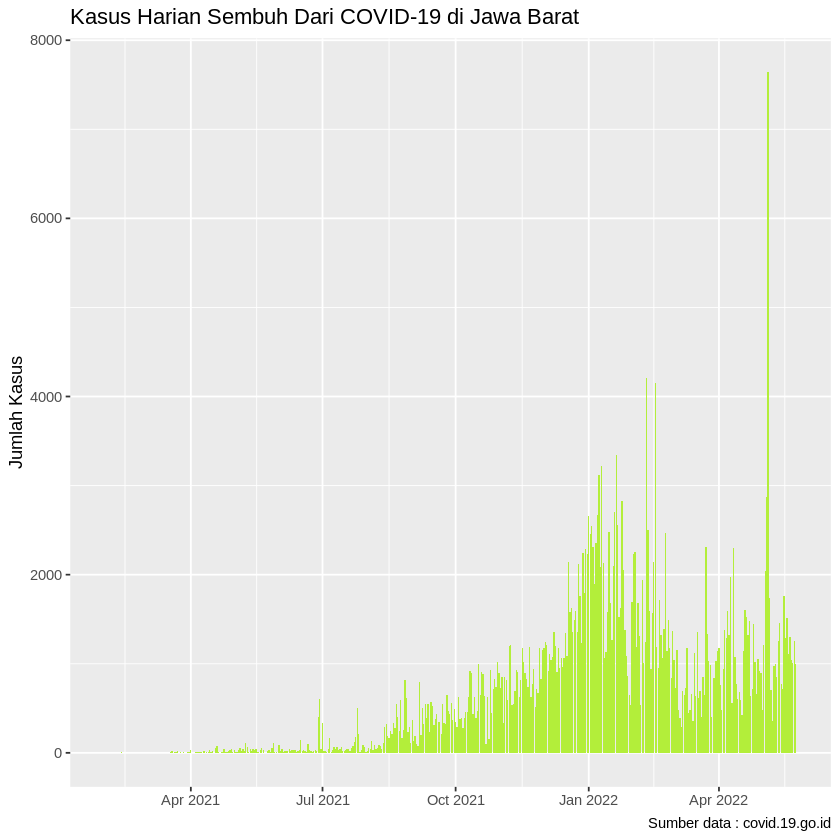

In [95]:
ggplot(data=new_cov_jabar, aes(tanggal,sembuh))+
  geom_col(fill="olivedrab2") +
  labs(
    x= NULL,
    y= "Jumlah Kasus",
    title = "Kasus Harian Sembuh Dari COVID-19 di Jawa Barat",
    caption = "Sumber data : covid.19.go.id"
  )

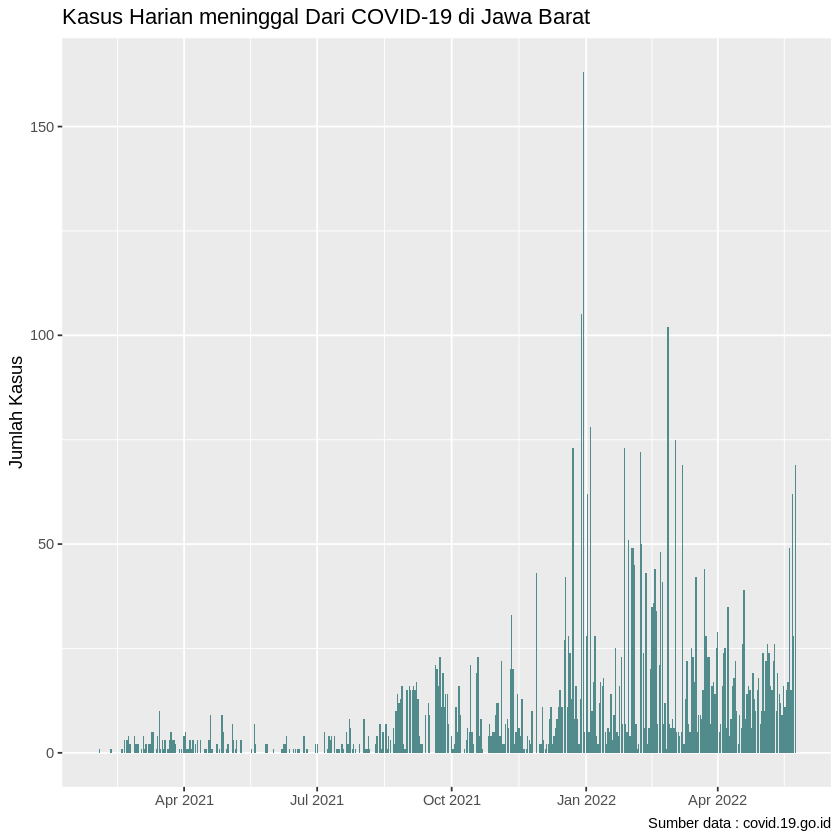

In [96]:
ggplot(data=new_cov_jabar, aes(tanggal,meninggal))+
  geom_col(fill="darkslategray4") +
  labs(
    x= NULL,
    y= "Jumlah Kasus",
    title = "Kasus Harian meninggal Dari COVID-19 di Jawa Barat",
    caption = "Sumber data : covid.19.go.id"
  )

In [97]:
install.packages("lubridate")
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [98]:
cov_jabar_pekanan <- new_cov_jabar %>%
  count(
    tahun = year(tanggal),
    pekan_ke = week(tanggal),
    wt = kasus_baru,
    name = "jumlah"
  )
glimpse(cov_jabar_pekanan)

Rows: 70
Columns: 3
$ tahun    <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2…
$ pekan_ke <dbl> 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21…
$ jumlah   <int> 6, 2, 28, 49, 178, 181, 233, 217, 235, 362, 186, 346, 226, 16…


In [99]:
cov_jabar_pekanan <- 
  cov_jabar_pekanan %>%
  mutate(
    jumlah_pekanlalu = dplyr::lag(jumlah,1),
    jumlah_pekanlalu = ifelse(is.na(jumlah_pekanlalu),0, jumlah_pekanlalu),
    lebih_baik = jumlah < jumlah_pekanlalu
  )
glimpse(cov_jabar_pekanan)

Rows: 70
Columns: 5
$ tahun            <dbl> 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,…
$ pekan_ke         <dbl> 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…
$ jumlah           <int> 6, 2, 28, 49, 178, 181, 233, 217, 235, 362, 186, 346,…
$ jumlah_pekanlalu <dbl> 0, 6, 2, 28, 49, 178, 181, 233, 217, 235, 362, 186, 3…
$ lebih_baik       <lgl> FALSE, TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, TRUE,…


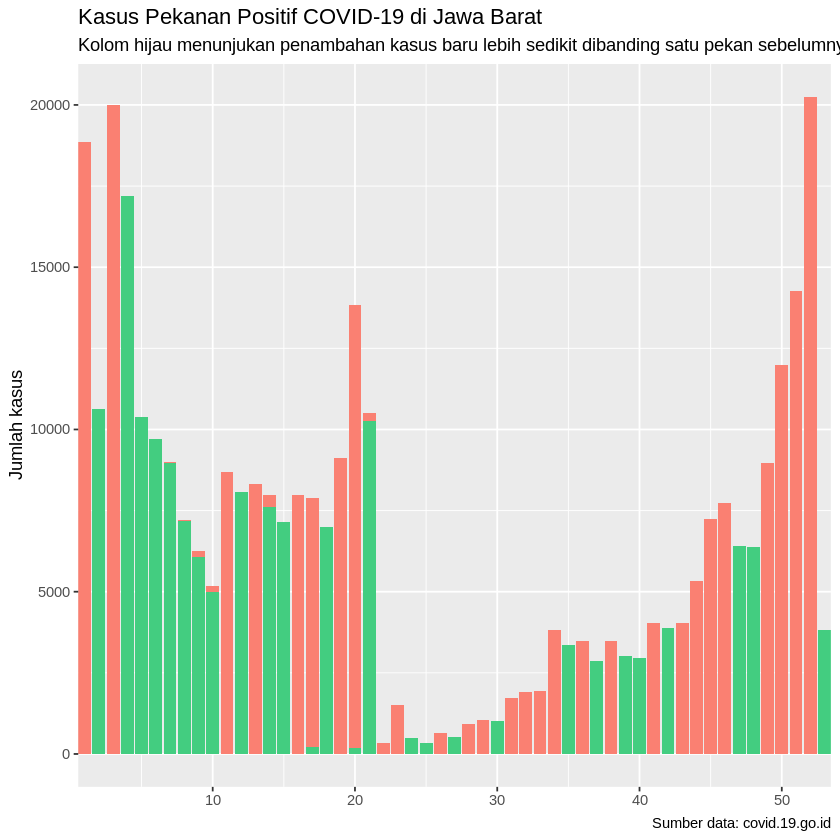

In [100]:
ggplot(cov_jabar_pekanan, aes(pekan_ke, jumlah, fill=lebih_baik))+
  geom_col(show.legend = FALSE) +
  scale_x_continuous(expand = c(0,0))+
  scale_fill_manual(values = c("TRUE"="seagreen3", "FALSE"="salmon"))+
  labs(
    x=NULL,
    y="Jumlah kasus",
    title = "Kasus Pekanan Positif COVID-19 di Jawa Barat",
    subtitle = "Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibanding satu pekan sebelumnya",
    caption = "Sumber data: covid.19.go.id"
  )

In [101]:
cov_jabar_akumulasi <- new_cov_jabar %>%
  transmute(
    tanggal,
    akumulasi_aktif = cumsum(kasus_baru) - cumsum(sembuh) - cumsum(meninggal),
    akumulasi_sembuh = cumsum(sembuh),
    akumulasi_meninggal = cumsum(meninggal)
  )
tail(cov_jabar_akumulasi)

,tanggal,akumulasi_aktif,akumulasi_sembuh,akumulasi_meninggal
,<date>,<int>,<int>,<int>
473,2022-05-19,25338,307843,4483
474,2022-05-20,26781,309142,4532
475,2022-05-21,27824,310188,4547
476,2022-05-22,28765,311194,4609
477,2022-05-23,30204,312446,4637
478,2022-05-24,32573,313440,4706


In [102]:
install.packages("tidyr")
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [103]:
dim(cov_jabar_akumulasi)

cov_jabar_akumulasi_pivot <- cov_jabar_akumulasi %>%
  pivot_longer(
    cols = -tanggal,
    names_to = "kategori",
    names_prefix = "akumulasi_",
    values_to = "jumlah"
  ) %>%
  mutate(
    kategori = sub(pattern = "akumulasi_", replacement = "", kategori)
  )
dim(cov_jabar_akumulasi_pivot)
glimpse(cov_jabar_akumulasi_pivot)

[1] 478   4

[1] 1434    3

Rows: 1,434
Columns: 3
$ tanggal  <date> 2021-02-01, 2021-02-01, 2021-02-01, 2021-02-02, 2021-02-02, …
$ kategori <chr> "aktif", "sembuh", "meninggal", "aktif", "sembuh", "meninggal…
$ jumlah   <int> 3, 0, 0, 3, 0, 1, 4, 0, 1, 5, 0, 1, 6, 0, 1, 6, 0, 1, 6, 0, 1…


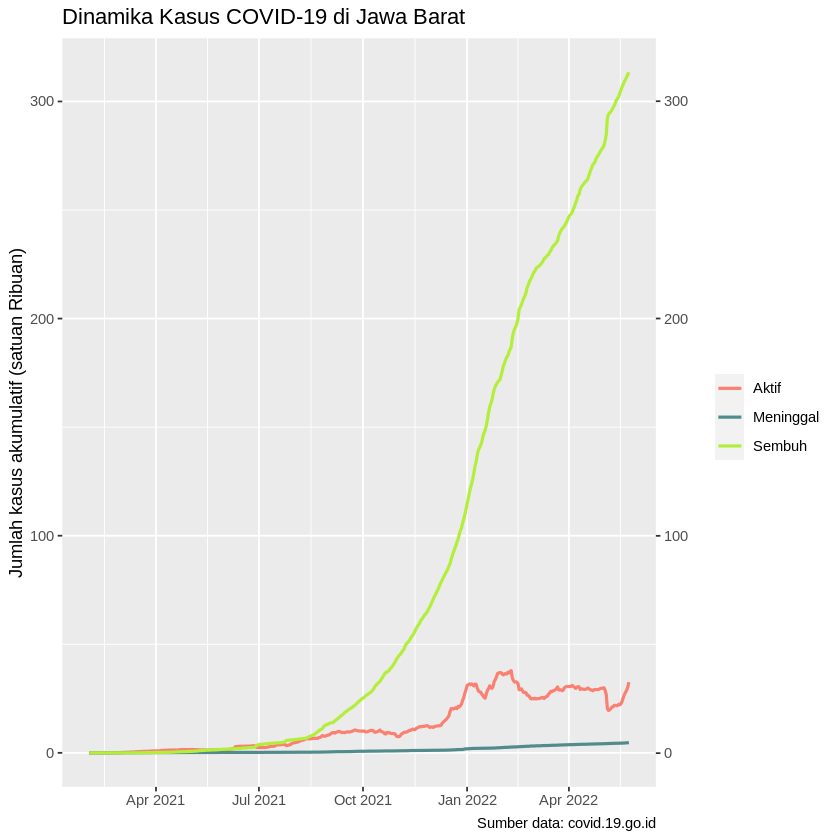

In [104]:
ggplot(cov_jabar_akumulasi_pivot, aes(tanggal, jumlah/1e3, colour=(kategori)))+
  geom_line(size=0.9) +
  scale_y_continuous(sec.axis = dup_axis(name = NULL))+
  scale_colour_manual(
    values = c(
      "aktif" = "salmon",
      "meninggal" = "darkslategray4",
      "sembuh" = "olivedrab2"
      ),
    labels = c("Aktif", "Meninggal","Sembuh")
    )+
  labs(
    x=NULL,
    y="Jumlah kasus akumulatif (satuan Ribuan)",
    colour = NULL,
    title = "Dinamika Kasus COVID-19 di Jawa Barat",
    caption = "Sumber data: covid.19.go.id"
  )